# Project: Investigate the TMDb movies dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
> **About the Dataset**: This data set contains information about 10,000 movies collected from The Movie Database (TMDb). It includes various factors such as popularity, user ratings, budget, revenue etc. In this project, I will try to answer the following questions by performing a data analysis on the given dataset and gain some insights on it.

   > **Questions to investigate**: 

   > **Q1. Which genres are most popular from year to year?**

   > **Q2. What are the factors associated with the revenue of the movies?**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### Data Import

In [2]:
df = pd.read_csv('tmdb-movies.csv')

### General Information

**Total no. of Rows:** 10866

**Total no. of Columns:** 21

**Null values are present in the following columns:**
1. imdb_id
2. cast
3. homepage
4. director
5. tagline
6. keywords
7. overview
8. genres
9. production_companies

>1. The Data given seems to be relatively clean.
>2. One duplicate record exists.
>3. The variable imdb_id is significant to identify the records uniquely but 10 entries have a null value which can be dropped.
>4. 23 entries have a null value in the genres column which can be dropped as well.
>5. Some other variables with missing values aren't significant so they can be retained.

In [3]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [6]:
sum(df.duplicated())

1

## Data Cleaning

### Removing Duplicates

As the duplicates would be redundant records for our investigation, they must be dropped from the dataset.

In [7]:
df.drop_duplicates(inplace=True)

### Dealing with NULL Values

We will now tackle the missing values, either by removing the affected enteries or entering the values, based on their relative proportion to complete data.

**As we saw in the previous step that we have null values in certain columns. Of these, imdb_id and genres are of relevance to us.** 

**The number of records with missing imdb_id values are only 10 out of 10865. Hence, we are removing rows with null values in imdb_id column using dropna method.**

In [8]:
df.dropna(subset=['imdb_id'], inplace=True)  
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10855 entries, 0 to 10865
Data columns (total 21 columns):
id                      10855 non-null int64
imdb_id                 10855 non-null object
popularity              10855 non-null float64
budget                  10855 non-null int64
revenue                 10855 non-null int64
original_title          10855 non-null object
cast                    10779 non-null object
homepage                2934 non-null object
director                10815 non-null object
tagline                 8038 non-null object
keywords                9368 non-null object
overview                10852 non-null object
runtime                 10855 non-null int64
genres                  10834 non-null object
production_companies    9830 non-null object
release_date            10855 non-null object
vote_count              10855 non-null int64
vote_average            10855 non-null float64
release_year            10855 non-null int64
budget_adj              1

**The number of records with missing genres values are 23 out of 10865. As we can see 23 is a very small number in the scope of the full dataset, something like two-tenths of a percent. So, it's completely reasonable to eliminate them from the dataframe, before working on the data manipulation.**

In [9]:
df.dropna(subset=['genres'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10834 entries, 0 to 10865
Data columns (total 21 columns):
id                      10834 non-null int64
imdb_id                 10834 non-null object
popularity              10834 non-null float64
budget                  10834 non-null int64
revenue                 10834 non-null int64
original_title          10834 non-null object
cast                    10759 non-null object
homepage                2929 non-null object
director                10795 non-null object
tagline                 8033 non-null object
keywords                9363 non-null object
overview                10832 non-null object
runtime                 10834 non-null int64
genres                  10834 non-null object
production_companies    9822 non-null object
release_date            10834 non-null object
vote_count              10834 non-null int64
vote_average            10834 non-null float64
release_year            10834 non-null int64
budget_adj              1

In [10]:
#checking if the null values are eliminated
df.isnull().sum()

id                         0
imdb_id                    0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      75
homepage                7905
director                  39
tagline                 2801
keywords                1471
overview                   2
runtime                    0
genres                     0
production_companies    1012
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Cleaning the Budget and Revenue Columns
The budget and revenue columns have large amount of zeros values in the data. So, to deal with this problem, we are going to first replace it with nan values and then take mean of the values and then fill the nan values with mean.

In [11]:
#replace zero values with nan
df = df.replace({'budget': {0: np.nan}})
df = df.replace({'revenue': {0: np.nan}})

In [12]:
#finding the mean for the columns
mean_budget = df['budget'].mean()
mean_revenue = df['revenue'].mean()

print(mean_budget)
print(mean_revenue)

30751473.30927037
89238858.70798102


In [13]:
#filling the column values with mean
df['budget'] = df.budget.fillna(mean_budget)
df['revenue'] = df.revenue.fillna(mean_revenue)

### Splitting the values of Genre column

The ‘genres’, contain multiple values separated by pipe (|) character. We need each category of the genre to be separated to work on the plot.

In [14]:
df['genres'].astype(str)

0              Action|Adventure|Science Fiction|Thriller
1              Action|Adventure|Science Fiction|Thriller
2                     Adventure|Science Fiction|Thriller
3               Action|Adventure|Science Fiction|Fantasy
4                                  Action|Crime|Thriller
5                       Western|Drama|Adventure|Thriller
6              Science Fiction|Action|Thriller|Adventure
7                        Drama|Adventure|Science Fiction
8                      Family|Animation|Adventure|Comedy
9                                Comedy|Animation|Family
10                                Action|Adventure|Crime
11              Science Fiction|Fantasy|Action|Adventure
12                                 Drama|Science Fiction
13                         Action|Comedy|Science Fiction
14                      Action|Adventure|Science Fiction
15                           Crime|Drama|Mystery|Western
16                                 Crime|Action|Thriller
17                      Science

In [15]:
genres_df = df['genres'].apply(lambda x: pd.Series(x.split('|')))
final_df = pd.concat([df, genres_df], axis=1)

The code above first creates a new data frame 'genre_df' which contains the different genres in different columns. Then we concatenate the original data frame 'df' and 'genres_df' to get the 'final_df'.

In [16]:
final_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,vote_count,vote_average,release_year,budget_adj,revenue_adj,0,1,2,3,4
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure,Science Fiction,Thriller,NaN
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Adventure,Science Fiction,Thriller,NaN
2,262500,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Science Fiction,Thriller,NaN,NaN
3,140607,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,5292,7.5,2015,1.839999e+08,1.902723e+09,Action,Adventure,Science Fiction,Fantasy,NaN
4,168259,tt2820852,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,2947,7.3,2015,1.747999e+08,1.385749e+09,Action,Crime,Thriller,NaN,NaN


In [17]:
final_df = final_df.rename(columns = {
    0:'Genre1',
    1:'Genre2',
    2:'Genre3',
    3:'Genre4',
    4:'Genre5'
})

In [18]:
new_df1=final_df[['id', 'popularity','release_year','Genre1','Genre2','Genre3','Genre4','Genre5']]

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Which genres are most popular from year to year?

In [19]:
df1_melted=pd.melt(new_df1, id_vars=["id", "popularity", "release_year"], var_name="Genre_type", value_name="Genre_value")
df1_melted = df1_melted.dropna(how='any')
final = df1_melted.sort_values(by=["id"])
final1 = final.reset_index()
final1.drop(["index", "Genre_type", "id"], axis=1, inplace=True)
final1.head()

,popularity,release_year,Genre_value
0,1.234890,1995,Comedy
1,0.815631,1993,Crime
2,0.815631,1993,Action
3,0.815631,1993,Thriller
4,12.037933,1977,Adventure


In [20]:
def group_years(genre_name):
    '''
    This function takes in a string that identifies the target
    column in merged_df, groups the data by release_year and 
    calculates the average popularity.
    '''
    genre = final1[final1['Genre_value'] == genre_name].copy()
    # drop the genre column as it's now extraneous
    genre.drop(['Genre_value'], axis=1, inplace=True)
    # group by release_year and calculate the mean
    popularity_mean = genre.groupby(['release_year']).mean().reset_index()
    # rename the popularity column to include the genre name
    popularity_mean.rename(columns={'popularity':'popularity_' + genre_name.lower()}, inplace=True)
    return popularity_mean

Now, we will run the above function against all the different genres and store the popularity of each of them against a given variable.

In [21]:
drama_popularity = group_years('Drama')
comedy_popularity = group_years('Comedy')
thriller_popularity = group_years('Thriller')
action_popularity = group_years('Action')
romance_popularity = group_years('Romance')
horror_popularity = group_years('Horror')
adventure_popularity = group_years('Adventure')
crime_popularity = group_years('Crime')
family_popularity = group_years('Family')
scifi_popularity = group_years('Science Fiction')
fantasy_popularity = group_years('Fantasy')
mystery_popularity = group_years('Mystery')
animation_popularity = group_years('Animation')
documentary_popularity = group_years('Documentary')
music_popularity = group_years('Music')
history_popularity = group_years('History')
war_popularity = group_years('War')
foreign_popularity = group_years('Foreign')
tv_popularity = group_years('TV Movie')
western_popularity = group_years('Western')

The popularity values of different genres obtained above are merged into a single df 'genre_merge' as shown below.

In [22]:
genre_merge = pd.merge(drama_popularity, comedy_popularity, on='release_year', how='left')
genre_merge = pd.merge(genre_merge, thriller_popularity, on='release_year', how='left')
genre_merge = pd.merge(genre_merge, action_popularity, on='release_year', how='left')
genre_merge = pd.merge(genre_merge, romance_popularity, on='release_year', how='left')
genre_merge = pd.merge(genre_merge, horror_popularity, on='release_year', how='left')
genre_merge = pd.merge(genre_merge, adventure_popularity, on='release_year', how='left')
genre_merge = pd.merge(genre_merge, crime_popularity, on='release_year', how='left')
genre_merge = pd.merge(genre_merge, family_popularity, on='release_year', how='left')
genre_merge = pd.merge(genre_merge, scifi_popularity, on='release_year', how='left')
genre_merge = pd.merge(genre_merge, fantasy_popularity, on='release_year', how='left')
genre_merge = pd.merge(genre_merge, mystery_popularity, on='release_year', how='left')
genre_merge = pd.merge(genre_merge, animation_popularity, on='release_year', how='left')
genre_merge = pd.merge(genre_merge, documentary_popularity, on='release_year', how='left')
genre_merge = pd.merge(genre_merge, music_popularity, on='release_year', how='left')
genre_merge = pd.merge(genre_merge, history_popularity, on='release_year', how='left')
genre_merge = pd.merge(genre_merge, war_popularity, on='release_year', how='left')
genre_merge = pd.merge(genre_merge, foreign_popularity, on='release_year', how='left')
genre_merge = pd.merge(genre_merge, tv_popularity, on='release_year', how='left')
genre_merge = pd.merge(genre_merge, western_popularity, on='release_year', how='left')

# checking the first result to see that we have all the expected columns
genre_merge.head(1)

,release_year,popularity_drama,popularity_comedy,popularity_thriller,popularity_action,popularity_romance,popularity_horror,popularity_adventure,popularity_crime,popularity_family,...,popularity_fantasy,popularity_mystery,popularity_animation,popularity_documentary,popularity_music,popularity_history,popularity_war,popularity_foreign,popularity_tv movie,popularity_western
0,1960,0.566305,0.396,0.81191,0.590725,0.541227,0.59145,0.700981,0.34648,0.278064,...,0.428247,NaN,NaN,NaN,0.423531,0.412364,0.225863,0.194948,NaN,0.567759


To compare the data, we will now draw a line graph. Since rendering all the 20 lines on a single graph may be difficult to view clearly, we will split these into 2 graphs. To decide which genres to be shown together, I have taken the 20 genres in the bar graph and divided them equally into 2 groups.

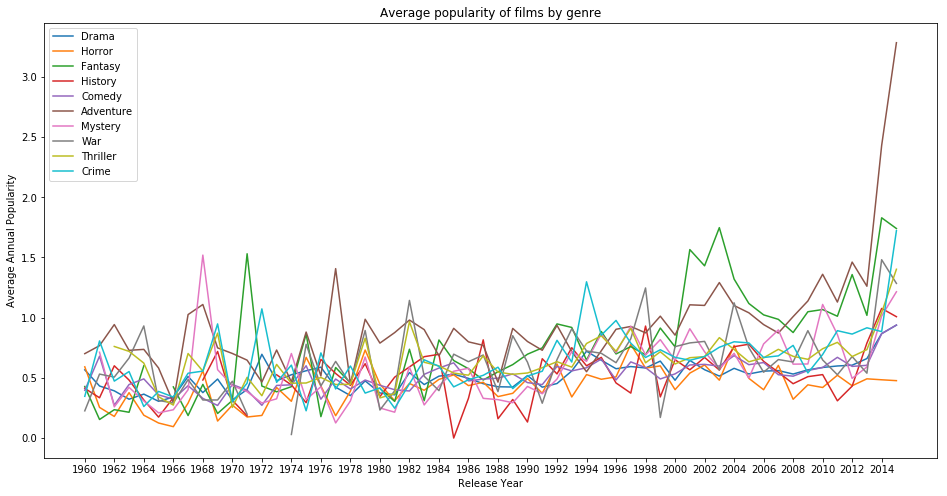

In [23]:
# Plotting the graph for Group 1.
fig, ax = plt.subplots(figsize=(16, 8))
plt.title('Average popularity of films by genre')
plt.ylabel('Average Annual Popularity')
plt.xlabel('Release Year')
plt.xticks(np.arange(1960, 2016, 2))
ax.plot('release_year', 'popularity_drama', data=genre_merge, label="Drama")
ax.plot('release_year', 'popularity_horror', data=genre_merge, label="Horror")
ax.plot('release_year', 'popularity_fantasy', data=genre_merge, label="Fantasy")
ax.plot('release_year', 'popularity_history', data=genre_merge, label="History")
ax.plot('release_year', 'popularity_comedy', data=genre_merge, label="Comedy")
ax.plot('release_year', 'popularity_adventure', data=genre_merge, label="Adventure")
ax.plot('release_year', 'popularity_mystery', data=genre_merge, label="Mystery")
ax.plot('release_year', 'popularity_war', data=genre_merge, label="War")
ax.plot('release_year', 'popularity_thriller', data=genre_merge, label="Thriller")
ax.plot('release_year', 'popularity_crime', data=genre_merge, label="Crime")
ax.legend(loc='upper left');

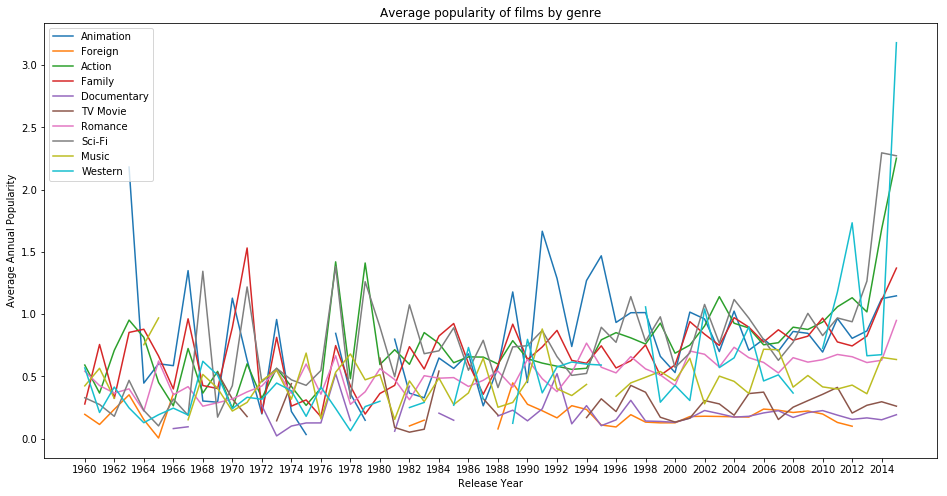

In [24]:
# Plotting the graph for Group 2.
fig, ax = plt.subplots(figsize=(16, 8))
plt.title('Average popularity of films by genre')
plt.ylabel('Average Annual Popularity')
plt.xlabel('Release Year')
plt.xticks(np.arange(1960, 2016, 2))
ax.plot('release_year', 'popularity_animation', data=genre_merge, label="Animation")
ax.plot('release_year', 'popularity_foreign', data=genre_merge, label="Foreign")
ax.plot('release_year', 'popularity_action', data=genre_merge, label="Action")
ax.plot('release_year', 'popularity_family', data=genre_merge, label="Family")
ax.plot('release_year', 'popularity_documentary', data=genre_merge, label="Documentary")
ax.plot('release_year', 'popularity_tv movie', data=genre_merge, label="TV Movie")
ax.plot('release_year', 'popularity_romance', data=genre_merge, label="Romance")
ax.plot('release_year', 'popularity_science fiction', data=genre_merge, label="Sci-Fi")
ax.plot('release_year', 'popularity_music', data=genre_merge, label="Music")
ax.plot('release_year', 'popularity_western', data=genre_merge, label="Western")
ax.legend(loc='upper left');

### Research Question 2: What are the factors associated with the revenue of the movies?

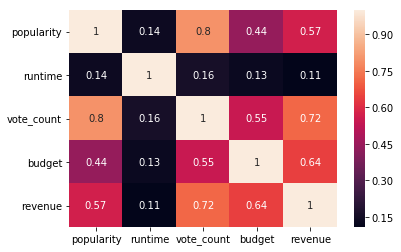

In [25]:
sns.heatmap(df[['popularity', 'runtime','vote_count','budget','revenue']].corr(),annot=True);

The above correlation matrix heatmap shows the dependence between multiple variables at the same time such as:
    
- Popularity: The more popular a movie is on the website, the greater revenue it should generate. As we can see, revenue and popularity have a high correlation coefficient of 0.56. The two are positively correlated.
  
- Runtime: There is a positive correlation coefficient of 0.11 for the two. This indicates that it is generally a good idea to have a runtime of 99.0 i.e. the median of runtime.
    
- Vote count: According to me, more the number of votes for a movie, more people should have watched it. As a result, we see that there is a strong positive correlation of 0.72. This indicates that more the number of people vote a movie, the more it get’s attention and possibly people go and watch it.

- Budget: The revenue of a movie is the amount of money raised by the sale of tickets of that particular movie. The budget has high correlation coefficient of 0.64. Thus, the two are positively correlated. This shows that budget of movies is one of the important factors for the movies to get high revenue.

<a id='conclusions'></a>
## Conclusions

In this analysis, we have considered the different movies and their genres and we have analysed the trends for each of them over the years. The genres like action, adventure, fantasy, science fiction have become popular over the years.

We have also tried to look for some of the factors which might be associated with the revenue of the movies like popularity, runtime, vote count and budget. We have found out that the factors like vote count, budget and popularity have higher corelation with revenue of the movies whereas the runtime has pretty low correaltion with revenue. 

## Limitations

In the above data analysis, we are trying to find the correlation between different factors of a movie. The metrics given are a subset of all the information that exists for a movie. Just like this portal, there are several other websites which measure vote count, popularity, etc. Hence, we cannot completely rely much just on the data we have. But our data can help predict the revenue of a movie to a certain extent based on different factors. We have also tried to predict trend of the popularity of genres over the years. As most of the movies have more than one genre, we have separated each of them to get the results.